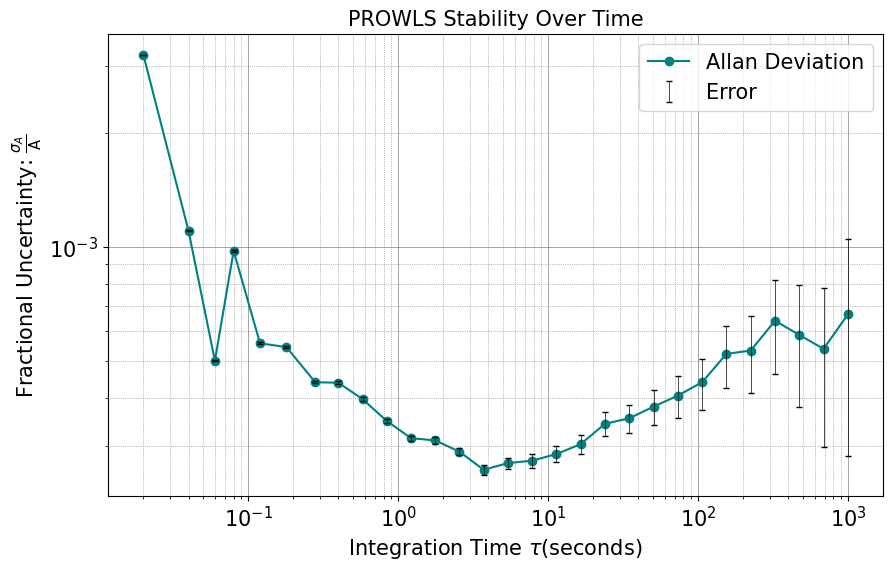

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

data = pd.read_csv('../Data/PSD_Allan_Deviation/Tables/time_vs_vlockin_PSD_180_1hr.csv')
time = data['Time'].values
voltage_microvolts = data['Vlockin (microvolts)'].values

median = data['Vlockin (microvolts)'].median()
max_tau = 10**3
taus = np.logspace(np.log10(1/50), np.log10(max_tau), num = 30)

tau, allan_deviation, ade, _ = allantools.adev(voltage_microvolts, data_type = 'freq', rate = 50, taus = taus)

plt.figure(figsize=(10, 6))
plt.loglog(tau, allan_deviation / median, marker='o', linestyle='-', label='Allan Deviation', color = 'teal')
plt.errorbar(x=tau, y=allan_deviation / median, yerr=ade / median, fmt='none', ecolor='black', elinewidth=0.5, capsize=2, label='Error')
plt.xlabel(r'Integration Time ${\tau} {\text{(seconds)}}$', fontsize = 15)
plt.ylabel(r'Fractional Uncertainty: $\frac{\sigma_A} {\text{A}}$', fontsize = 15)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.title('PROWLS Stability Over Time', fontsize = 15)
plt.savefig('../Pretty_Plots/Stability_Over_Time.pdf')
plt.show()

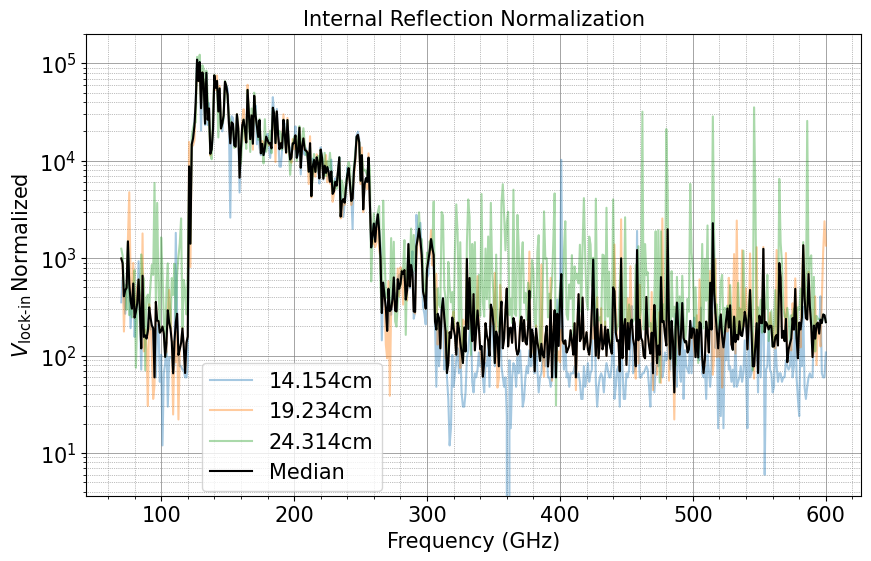

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df5 = pd.read_csv('../Data/Internal_Reflection_Test/Tables/f_vs_vlockin_intref2_14p154.csv')
df7 = pd.read_csv('../Data/Internal_Reflection_Test/Tables/f_vs_vlockin_intref2_19p234.csv')
df9 = pd.read_csv('../Data/Internal_Reflection_Test/Tables/f_vs_vlockin_intref2_24p314.csv')
df5['Vlockin Normalized'] = df5['Vlockin (microvolts)'] * 200.335716
df7['Vlockin Normalized'] = df7['Vlockin (microvolts)'] * 369.946756
df9['Vlockin Normalized'] = df9['Vlockin (microvolts)'] * 591.170596
df_combined = pd.concat([df5[['Desired Frequency (GHz)', 'Vlockin Normalized']],
                         df7[['Desired Frequency (GHz)', 'Vlockin Normalized']],
                         df9[['Desired Frequency (GHz)', 'Vlockin Normalized']]])
median_df = df_combined.groupby('Desired Frequency (GHz)')['Vlockin Normalized'].median().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df5['Desired Frequency (GHz)'], df5['Vlockin Normalized'], label='14.154cm', alpha = 0.4)
plt.plot(df7['Desired Frequency (GHz)'], df7['Vlockin Normalized'], label='19.234cm', alpha = 0.4)
plt.plot(df9['Desired Frequency (GHz)'], df9['Vlockin Normalized'], label='24.314cm', alpha = 0.4)
plt.plot(median_df['Desired Frequency (GHz)'], median_df['Vlockin Normalized'], label='Median', color='black')
plt.yscale('log')
plt.xlabel('Frequency (GHz)', fontsize = 15 )
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}} \, \mathrm{Normalized}$', fontsize = 15)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.136, 0.31), fontsize = 15)  # Adjust coordinates as needed
plt.title('Internal Reflection Normalization', fontsize = 15)
plt.savefig('../Pretty_Plots/Internal_Reflections_Analysis.pdf')
plt.show()

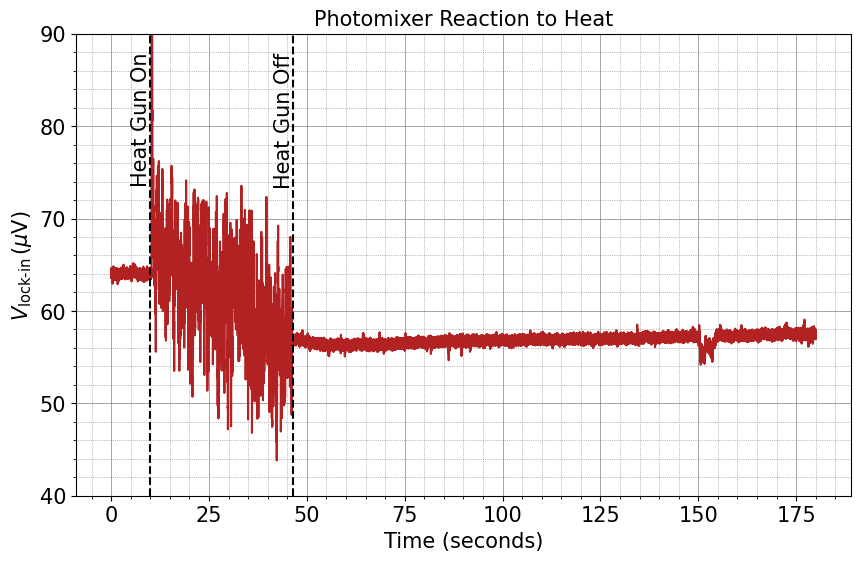

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../Data/Heat_Test/Tables/time_vs_vlockin_heat_photomixer2.csv')
plt.figure(figsize = (10, 6))
plt.plot(df['Time'], df['Vlockin (microvolts)'], color = 'firebrick')
plt.xlabel('Time (seconds)', fontsize = 15)
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}} \, (\mu\mathrm{V})$', fontsize = 15)
plt.ylim(40, 90)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.axvline(x=10, color='black', linestyle='--')
plt.text(5, 88, 'Heat Gun On', rotation=90, verticalalignment='top', color='black', fontsize= 15)
plt.axvline(x=46.5, color='black', linestyle='--')
plt.text(41.5, 88, 'Heat Gun Off', rotation=90, verticalalignment='top', color='black', fontsize= 15)
plt.title('Photomixer Reaction to Heat', fontsize = 15)
plt.savefig('../Pretty_Plots/Heat_Photomixer_Analysis.pdf')
plt.show()

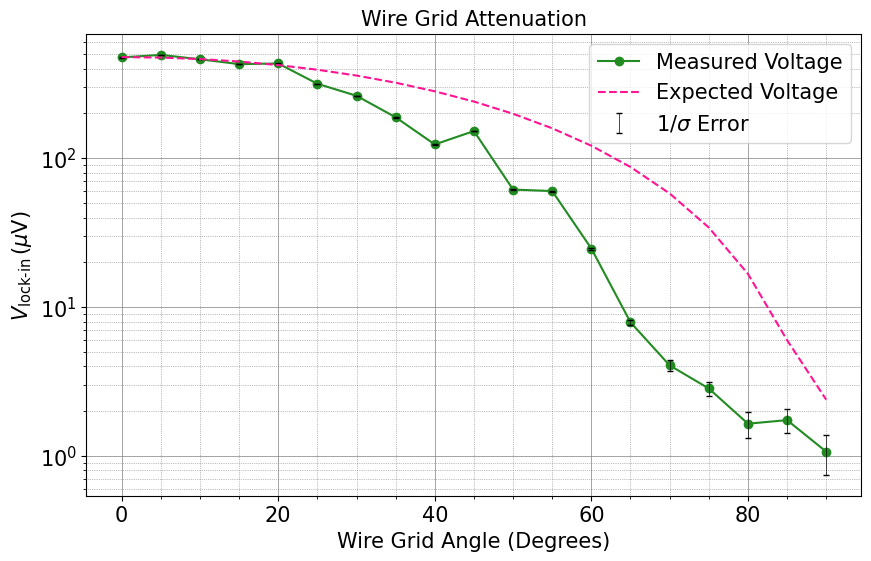

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_files = ['time_vs_vlockin_attenuation_0deg.csv',
    'time_vs_vlockin_attenuation_5deg.csv',
    'time_vs_vlockin_attenuation_10deg.csv',
    'time_vs_vlockin_attenuation_15deg.csv',
    'time_vs_vlockin_attenuation_20deg.csv',
    'time_vs_vlockin_attenuation_25deg.csv',
    'time_vs_vlockin_attenuation_30deg.csv',
    'time_vs_vlockin_attenuation_35deg.csv',
    'time_vs_vlockin_attenuation_40deg.csv',
    'time_vs_vlockin_attenuation_45deg.csv',
    'time_vs_vlockin_attenuation_50deg.csv',
    'time_vs_vlockin_attenuation_55deg.csv',
    'time_vs_vlockin_attenuation_60deg.csv',
    'time_vs_vlockin_attenuation_65deg.csv',
    'time_vs_vlockin_attenuation_70deg.csv',
    'time_vs_vlockin_attenuation_75deg.csv',
    'time_vs_vlockin_attenuation_80deg.csv',
    'time_vs_vlockin_attenuation_85deg.csv',
    'time_vs_vlockin_attenuation_90deg.csv']

medians = []
std_devs = []

for file in data_files:
    data = pd.read_csv(f'../Data/Attenuation_Test/Tables/{file}')
    medians.append(data['Vlockin (microvolts)'].median())
    std_devs.append(data['Vlockin (microvolts)'].std())

data0 = pd.read_csv('../Data/Attenuation_Test/Tables/time_vs_vlockin_attenuation_0deg.csv')
degrees = np.arange(0, 91, 5)
theta_radians = np.deg2rad(degrees)
cross_pol = -(0.005+1)/(0.005-1)
cos_theta_squared = (0.5*(cross_pol + np.cos(2*theta_radians))) * data0['Vlockin (microvolts)'].median()

plt.figure(figsize=(10, 6))
plt.plot(degrees, medians, marker = 'o', linestyle = '-', label = 'Measured Voltage', color = 'forestgreen')
plt.errorbar(degrees, medians, yerr = std_devs, fmt='none', ecolor='black', elinewidth=0.5, capsize=2, label= r'1/${\sigma}$ Error')
plt.plot(degrees, cos_theta_squared, linestyle = '--', label = 'Expected Voltage', color = 'deeppink')
plt.yscale('log')
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlabel('Wire Grid Angle (Degrees)', fontsize = 15)
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}} \, (\mu\mathrm{V})$', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 15)
plt.title('Wire Grid Attenuation', fontsize = 15)
plt.savefig('../Pretty_Plots/Wire_Grid_Attenuation.pdf')
plt.show()

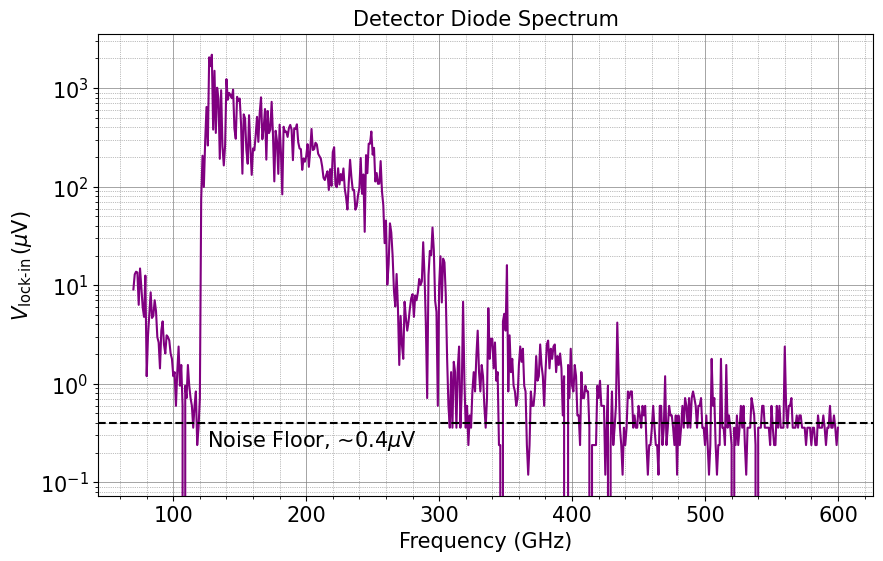

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../Data/Add_Mirrors/Tables/f_vs_vlockin_Mirrors_7-11-24.csv')
plt.figure(figsize = (10, 6))
plt.plot(df['Desired Frequency (GHz)'], df['Vlockin (microvolts)'], color = 'purple')
plt.yscale('log')
plt.axhline(y= 0.4, color='black', linestyle='--')
plt.text(125, 0.35, r'Noise Floor, ~0.4$\mu\mathrm{V}$', verticalalignment='top', color='black', fontsize= 15)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}} \, (\mu\mathrm{V})$', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Detector Diode Spectrum', fontsize = 15)
plt.savefig('../Pretty_Plots/Frequency_Sweep.pdf')
plt.show()

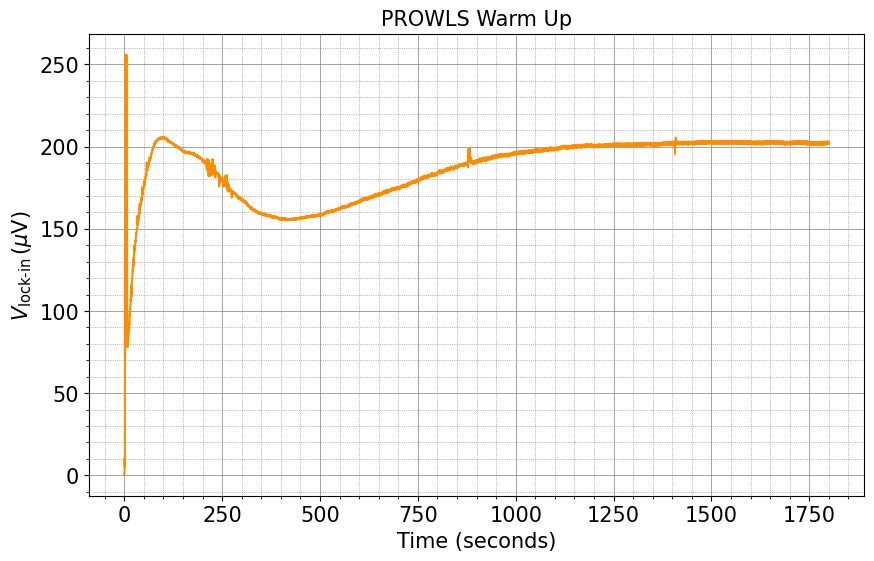

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../Data/Baseline_Daily/Tables/time_vs_vlockin_baseline3_7-2-24.csv')
plt.figure(figsize = (10, 6))
plt.plot(df['Time'], df['Vlockin (microvolts)'], color = 'darkorange')
plt.xlabel('Time (seconds)', fontsize = 15)
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}} \, (\mu\mathrm{V})$', fontsize = 15)
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.title('PROWLS Warm Up', fontsize = 15)
plt.savefig('../Pretty_Plots/Stability_Baseline.pdf')
plt.show()

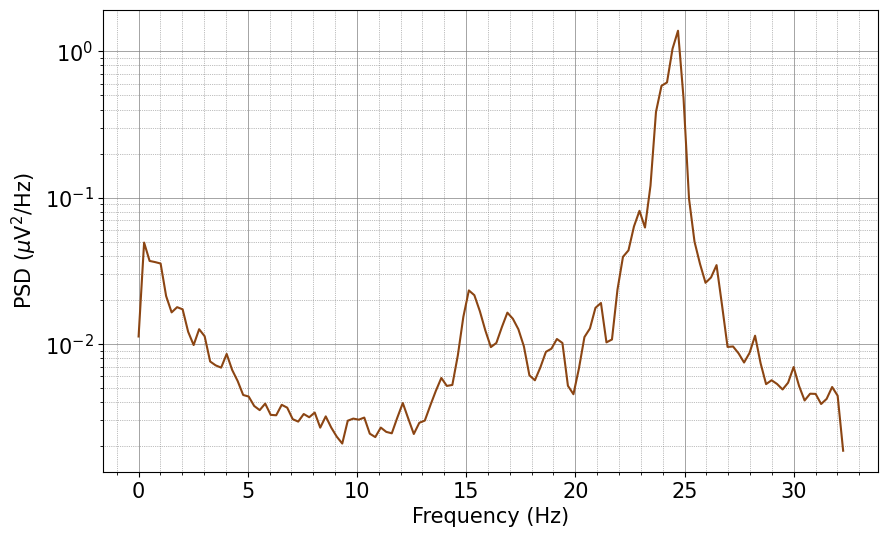

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch

data = pd.read_csv('../Data/PSD_Allan_Deviation/Tables/time_vs_vlockin_PSD_180_1hr.csv')
time = data['Time'].values
voltage = data['Vlockin (microvolts)'].values
 
sampling_frequency = 1 / np.mean(np.diff(time))
 
frequencies, psd = welch(voltage, fs = sampling_frequency)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd, color = 'saddlebrown')
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize =15)
plt.ylabel(r'PSD ($\mu \mathrm{V}^2/\mathrm{Hz}$)', fontsize =15)
plt.savefig('../Pretty_Plots/PSD.png')
plt.show()